# Assignment 1 (shortened)
This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. The deadline for handing in this assignment is April 3. You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

**Answer**:
1. `n_estimators`:
Number of decision trees to grow in the random forest. Having too few trees will result in the model not having the complexity to fit the data and will therefore make bad predictions. Having too many trees, on the other hand, can result in the model overfitting the data which also results in bad predictions. Furthermore, it is computationally expensive to grow too many trees. 


2. `max_depth`:
The depth of the tree. We will not like it to be infinity, because then our model will overfit the data, i.e. it will have a bad generalization performance. On the other hand, a too low `max_depth` will result in underfitting. There is a trade-off between `n_estimators` and `max_depth` that we want to balance.


3. `max_features`:
The number of features (variables) we want to randomly subsample when finding the best fit. Choosing to subsample too many features will improve the prediction of the individual trees but the trees will be highly correlated. Choosing a too low value for `max_features`  will result in a low correlation between the trees which will improve the average prediction of the wholke forest, but will make the individual trees' prediciton worse. Again, there is a trade-off that we have to balance. 


4. `bootstrap`:
Whether bootstrap samples are used when building trees. If `False`, the whole dataset is used to build each tree. When it is set to `True`, subsamples of the training dataset sampled with replacement is used to build the decision trees. We definitely want `bootstrap = True`, because this reduces the overall variance of the predictions of the decision trees. 


<br>

> **Ex. 2.1.2**: For `n_estimators > 1` how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

**Answer**:

If we include all features in `max_features` and set `bootstrap = False` we will use all the features and all the data, which will result in identical trees. 

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

In [2]:
# Import modules
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import umap

In [4]:
# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

In [5]:
# Function to make the four plots for different data
def plot_unsupervised(X, y):
    fig, axes = plt.subplots(2,2, figsize=(7,8))
    plt.subplots_adjust(wspace=0.3, hspace=0.4)
    plt.suptitle("Comparison of different methods for dimensionality reduction") 
    
    n_colors = len(np.unique(y))
    
    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    pca1 = X_pca[:,0]
    pca2 = X_pca[:,1]
    
    sns.scatterplot(
        x=pca1, y=pca2,
        hue=y,
        palette=sns.color_palette("hls", n_colors),
        linewidth=0,
        legend=None,
        ax=axes[0,0]
    )
    axes[0,0].set_ylabel("2nd component")
    axes[0,0].set_xlabel("1st component")
    axes[0,0].set_title("PCA")
    
    
    # LDA
    lda = LDA(n_components=2)
    X_lda = lda.fit_transform(X, y)
    lda1 = X_lda[:,0]
    lda2 = X_lda[:,1]

    sns.scatterplot(
        x=lda1, y=lda2,
        hue=y,
        palette=sns.color_palette("hls", n_colors),
        linewidth=0,
        legend=None,
        ax=axes[0,1]
    )
    axes[0,1].set_ylabel("2nd component")
    axes[0,1].set_xlabel("1st component")
    axes[0,1].set_title("LDA")
    
    # t-SNE
    X_tsne = TSNE(n_components=2).fit_transform(X)
    tsne1 = X_tsne[:,0]
    tsne2 = X_tsne[:,1]

    sns.scatterplot(
        x=tsne1, y=tsne2,
        hue=y,
        palette=sns.color_palette("hls", n_colors),
        linewidth=0,
        legend=None,
        ax=axes[1,0]
    )
    axes[1,0].set_ylabel("2nd component")
    axes[1,0].set_xlabel("1st component")
    axes[1,0].set_title("t-SNE")
    
    # UMAP
    Umap = umap.UMAP()
    X_umap = Umap.fit_transform(X)
    umap1 = X_umap[:,0]
    umap2 = X_umap[:,1]

    sns.scatterplot(
        x=umap1, y=umap2,
        hue=y,
        palette=sns.color_palette("hls", n_colors),
        linewidth=0,
        legend=None,
        ax=axes[1,1]
    )
    axes[1,1].set_ylabel("2nd component")
    axes[1,1].set_xlabel("1st component")
    axes[1,1].set_title("UMAP")

    plt.show()

**Answer**:

1. The four figures are shown below, where the t-SNE and UMAP seem to work especially well at grouping the data. 

Not standardised digits data


C:\Users\sune-\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


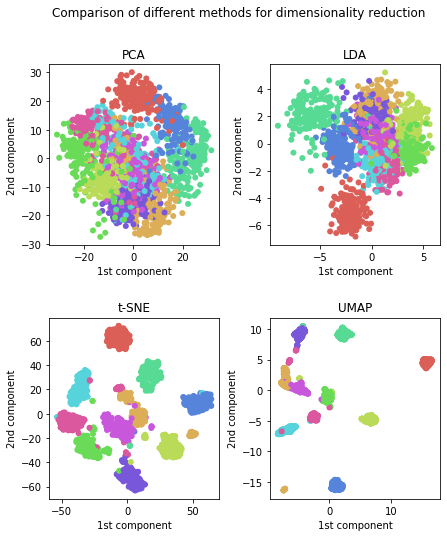

In [28]:
# Not standardised digits data
print('Not standardised digits data')
plot_unsupervised(X=X_digits, y=y_digits)

**Answer continued**:

2. I have used the four methods used on both the not standardised and the standardised wine data and plotted it below. It is clear from the first four figures that PCA, t-SNE, and UMAP do not work well on the non-standardised wine data. This is due to the fact that the features with a naturally higher variance (because of the unit they are measured in) seem like they explain a lot of the variation in the data. This is not a problem for the digits data because all the features are measured on the same scale.


3. It is clear from all the figures that UMAP and t-SNE are performing better than PCA and LDA. This is because UMAP and t-SNE are made for non-linear data, and this data is non-linear. The applicability of non-linear methods are of course better on non-linear data than linear methods (as PCA and LDA) are. A disadvantage of the UMAP and t-SNE methods is that we can't "go back" to see the true placement of a data point, because it is numerically determined with these methods. 

Not standardised wine data


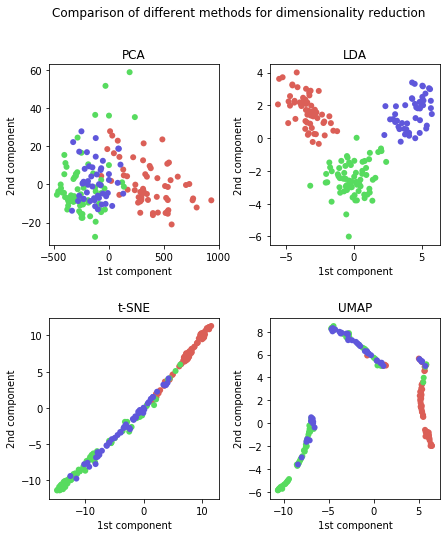

Standardised wine data


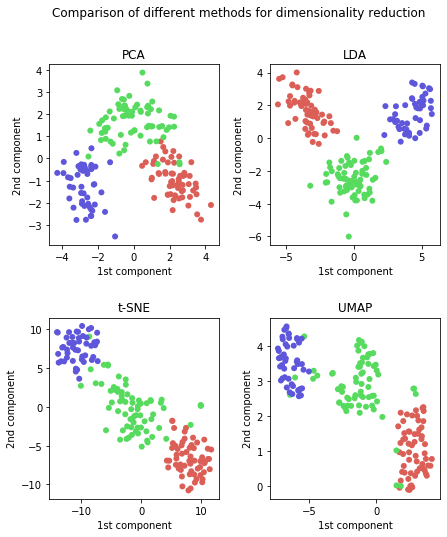

In [30]:
# Not standardised wine data
print('Not standardised wine data')
plot_unsupervised(X=X_wine, y=y_wine)

# Standardised wine data
X_wine_std = sc.fit_transform(X_wine)
print('Standardised wine data')
plot_unsupervised(X=X_wine_std, y=y_wine)

## Problems from exercise set 4

> **Ex. 4.2.1**: What does it mean that a tree is honest? In particular what are the implications in terms of
> - The intuition for why honesty is required in order to get good local treatment effect estimates?
> - The practical implementation of the DT algorithm?

**Answer**:

An honest tree is a tree that is grown using one subsample of the data, while the predictions at the leaves of the tree are estimated using a different subsample.


The big difference from predicting and estimating heterogeneous treatment effects is that we in the first case observe the true outcomes, which we do not in the latter case. Usually, we evaluate our random forest by using it to make predictions on a test dataset and measuring its predictions' accuracy by comparing with the true outcome, but we can't do this when estimating treatment effects. To evaluate the performance of an estimator of a treatment effect, we look at the bias and the cinfidence interval of the estimator, i.e. we do inference, and to be able to do inference, we need asymptotic normality.  "Normal" random forests do not have the property of asymptotic normality, but if you grow a random forest of honest trees, a so-called causal forest, the estimates of treatment effects in the terminal nodes are asymptotically normal and consistent. 


The training data is split into two subsamples without replacement. All the splits are made in the first subsample, i.e. the honest tree is grown in this subsample of the training data. Then, the predictions are made in the other subsample. A heterogeneous treatment effect is estimated as the difference in the average outcomes between the observations that are treated and not treated, respectively, in a terminal node of the tree. 